# Medical Cost Prediction
---

## Reason and Aim

* Medical costs are any expenses incurred for the prevention or treatment of disease or injury and they are affected by many factors. This medical cost dataset has enough samples and variables including  both categorical and numerical variables. In order to understand and predict medical costs billed by health insurance correctly, it is necessary to analyze what correlation the variables have. The aim of this study is to analyze this data set, to reveal which factors affect health expenditures the most, and to predict health expenditures with the help of machine learning.

## STEP 1. Loading The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import seaborn as sns
dark = sns.color_palette('dark')
bright = sns.color_palette('bright')
deep = sns.color_palette('deep')
pastel = sns.color_palette('pastel')
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data

data = pd.read_csv('insurance.csv')

In [3]:
# check data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Columns 
* Age : age of primary beneficiary  
* sex : Insurance contractor gender (female or male)
* Bmi : Body mass index 
* Children : Number of children covered by insurance(0 to 5)
* Smoker : whether smoke or not (yes or no)  
* Region : the beneficiary's residential area in the US (Southwest, Southeast, Northwest,or  Northeast) 
* Charges : Individual medical cost billed by health insurance 
---
#### x variables (independent) = 'age','sex','bmi','children','smoker','region'

#### y variable(dependent) = 'charges'

## STEP 2. EDA

### Basic EDA

In [4]:
# checking the shape of the data
data.shape

(1338, 7)

In [5]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# desciption of data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking if there's any null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There is no null value

### Distribution Of Variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

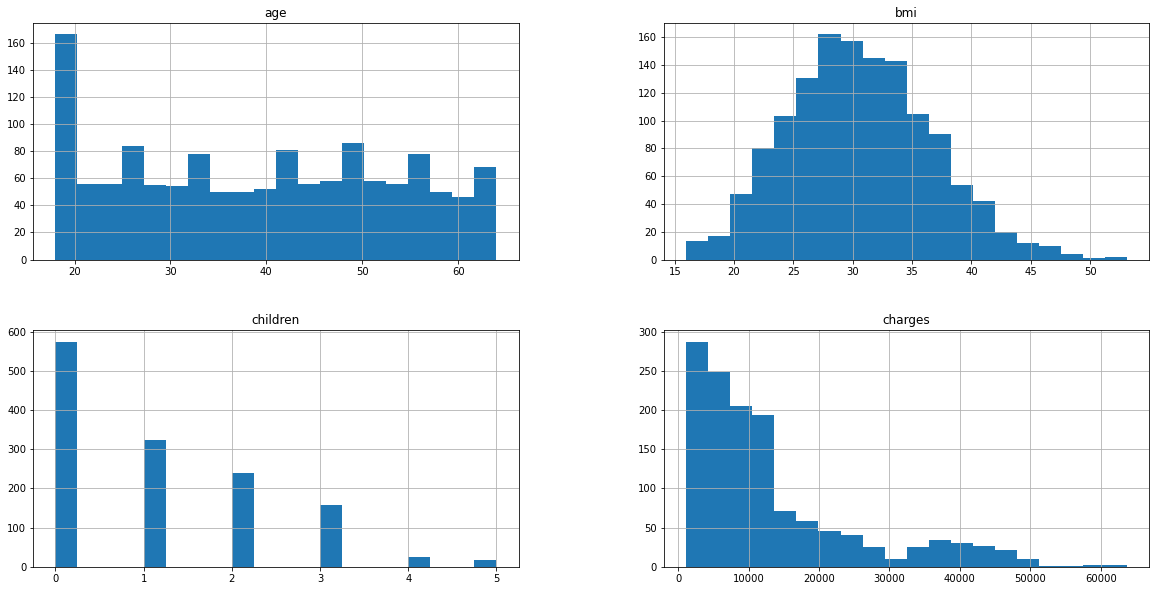

In [8]:
# Numerical variables
data.hist(bins=20,figsize=(20,10))

* bmi shows normal distribution.
* age, children, and charges are right skewed.

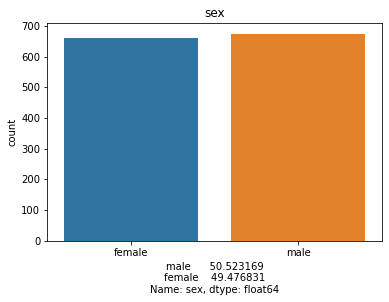

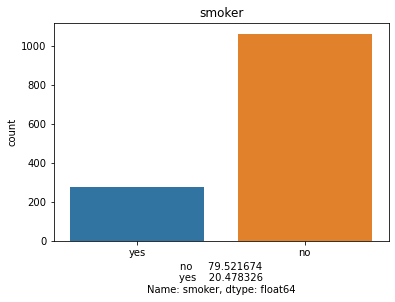

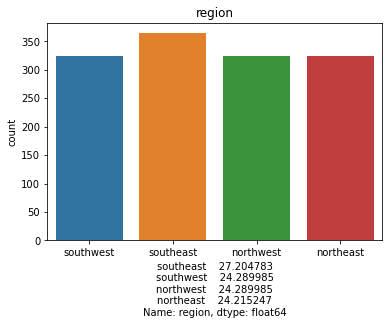

In [9]:
# Categorical variables
categorical_columns = [feature for feature in data.columns if data[feature].dtype=='O']
for col in categorical_columns:
    sns.countplot(col,data=data)
    labels = (data[col].value_counts() / len(data))*100
    plt.title(col)
    plt.xlabel(f'{labels}')
    plt.show()

* The distribution between smoker and non-smoker shows unequal.
* Smoker is about 4 times greater than non-smoker.
* sex and region shows almost equal distribution.
* Males and females almost equal in number.
* Beneficiaries almost equally distributed across the 4 regions and almost have all the same charges.


### Relationship Between Features and Dependent Variable

In [10]:
#print all columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### AGE

<AxesSubplot:xlabel='age'>

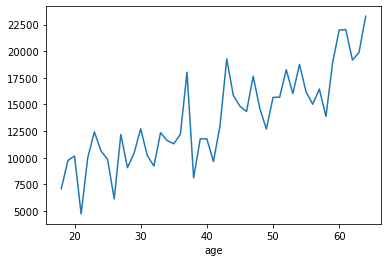

In [11]:
#age vs charges
data.groupby('age')['charges'].mean().plot()

* Given the plot above, we can see that insurance charges increases with age, which is generally true because people with higher age is more likely to have a higher chance of death. 
* Also, increases the higher risk having underlying health condition that interferes with daily life or activities and requires continous medical attention or medical care.

<AxesSubplot:xlabel='age'>

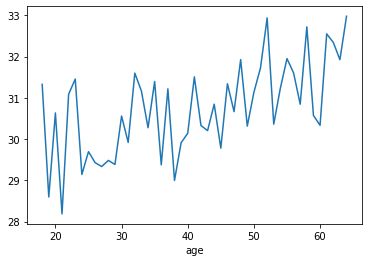

In [12]:
# age vs bmi
data.groupby('age')['bmi'].mean().plot()

* It shows that there's positive trend between age and bmi. When age increases, bmi also increases.

<AxesSubplot:xlabel='age'>

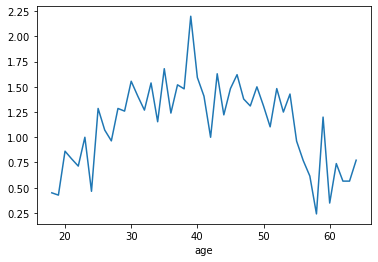

In [13]:
# age vs children
data.groupby('age')['children'].mean().plot()

* There's increase in age  between 18 and 40 for number of children and decrease after age 40. of 

#### BMI

<AxesSubplot:xlabel='bmi', ylabel='charges'>

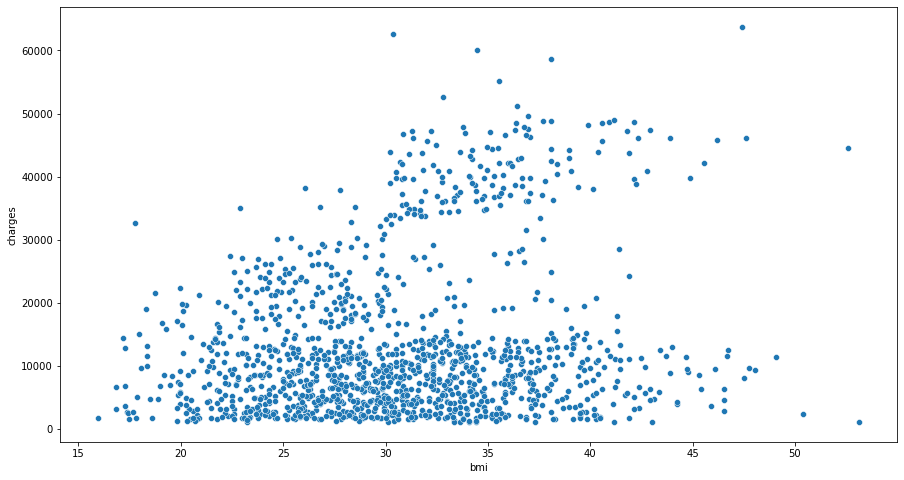

In [14]:
# bmi vs charges
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='bmi',y='charges')

* There's a tendency that higher bmi has higher charges.

#### SEX

<AxesSubplot:xlabel='sex'>

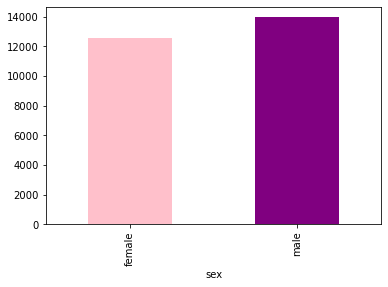

In [15]:
# sex vs charges
temp = data.groupby('sex')['charges'].mean()
temp.plot(kind='bar',color=['pink','purple'])

* There is not much differenct between femalel and male for charges.

<AxesSubplot:xlabel='sex'>

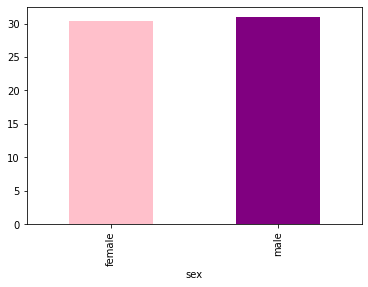

In [16]:
# sex vs bmi
temp = data.groupby('sex')['bmi'].mean()
temp.plot(kind='bar',color=['pink','purple'])

#### Smoker

<AxesSubplot:xlabel='smoker', ylabel='charges'>

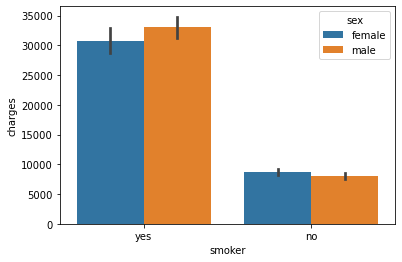

In [17]:
# smoker(sex) vs charges
sns.barplot(data=data,x='smoker',y='charges',hue='sex')

* There's a big difference between smokers and non-smokers in charges.
* Smoker has higher insurance charges than non-smoker.
* There's not much difference between female and male.

<AxesSubplot:xlabel='smoker', ylabel='age'>

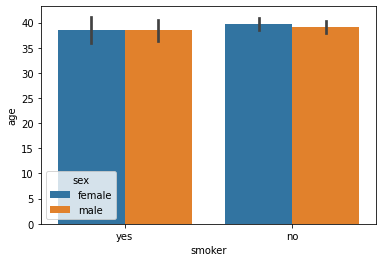

In [18]:
sns.barplot(data=data,x='smoker',y='age',hue='sex')

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

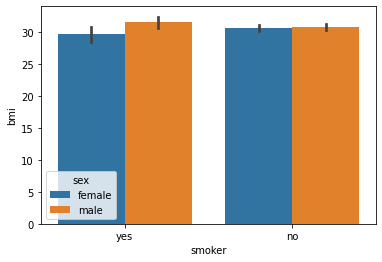

In [19]:
sns.barplot(data=data,x='smoker',y='bmi',hue='sex')

#### Children

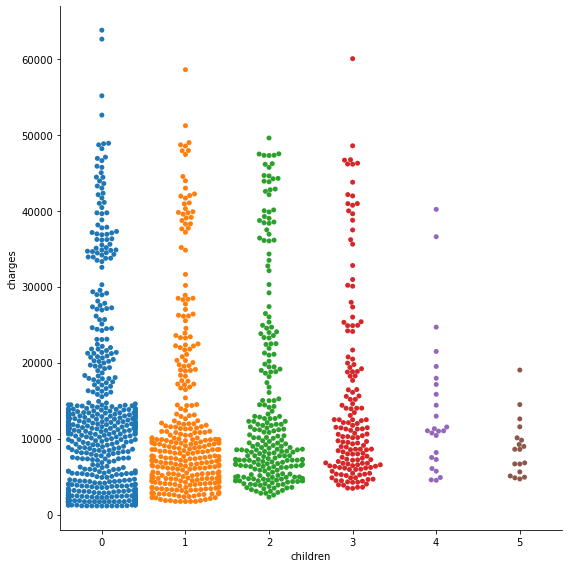

In [20]:
# children vs charges
sns.catplot(x="children", y="charges",kind="swarm", data=data,height=8)

* Charge for children ranges mostly similar.

#### Region

<AxesSubplot:xlabel='region', ylabel='charges'>

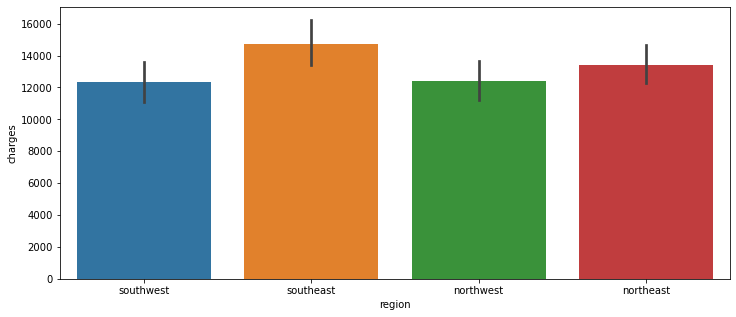

In [21]:
# Region vs Charges
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='region',y='charges')

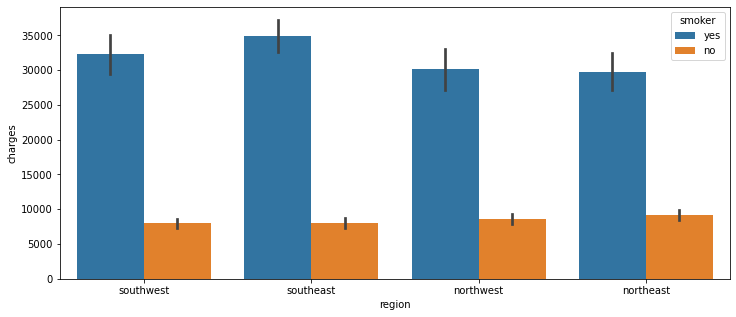

In [22]:
# Region vs Smoker
plt.figure(figsize=(12,5))
ax = sns.barplot(data=data,x='region',y='charges',hue='smoker')

### Sex, Smoker, Region vs Charges

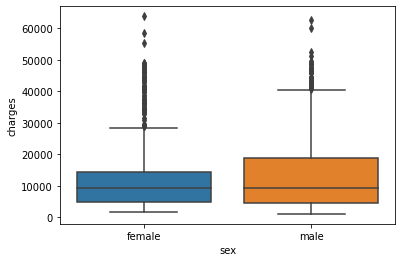

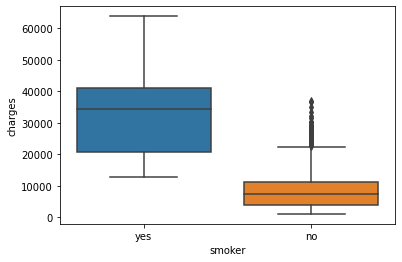

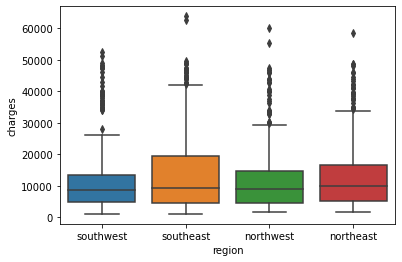

In [23]:
ax = sns.boxplot(x='sex', y='charges', data=data)
plt.show()
ax = sns.boxplot(x='smoker', y='charges', data=data)
plt.show()
ax = sns.boxplot(x='region', y='charges', data=data)
plt.show()

### Summary of Analysis
* There's no missing values in the data.
* There are four numerical variables : ['age','bmi','children','charges']
* There are three categorical variables : ['sex','smoker','region']
* There is a positive relationship between age and charges.
* Smoker has higher charges than non-smoker.
* Sex has unequal proportion between male and female. Male is about 4 times greater than female. 
* Sex and region show smiliar charge ranges on each category. 
* Southeast region has more smokers and higher charges than other regions(southwest,northwest,northeast).



## STEP 3. Transformation

#### Normalization
Since 'age' and 'charge' are skewed, we need to normalize them.


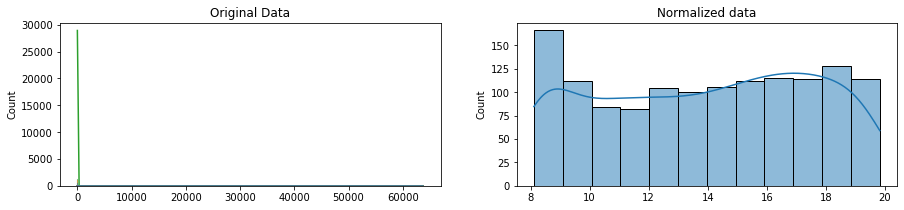

In [24]:
# set seed for reproducibility
np.random.seed(0)
# normalize the exponential data with boxcox
normalized_age = stats.boxcox(data['age'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_age[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

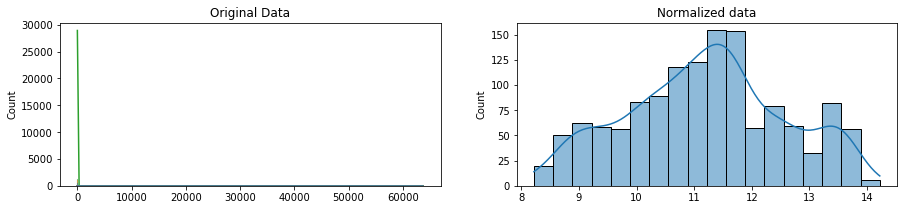

In [25]:
# set seed for reproducibility
np.random.seed(0)
# normalize the exponential data with boxcox
normalized_charges = stats.boxcox(data['charges'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_charges[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [26]:
# Label encoding all categorical columns
# replace the string values to numerical values
data.sex.replace(('female','male'),(1,0), inplace = True)
data.smoker.replace(('yes','no'),(1,0), inplace = True)
# 'southwest'=1,'southeast'=2,'northwest'=3,'northeast'=4
data.region.replace(('southwest','southeast','northwest','northeast'),(1,2,3,4), inplace = True)

In [27]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160


Text(0.5, 1.0, 'Cube Root-Transformed Data')

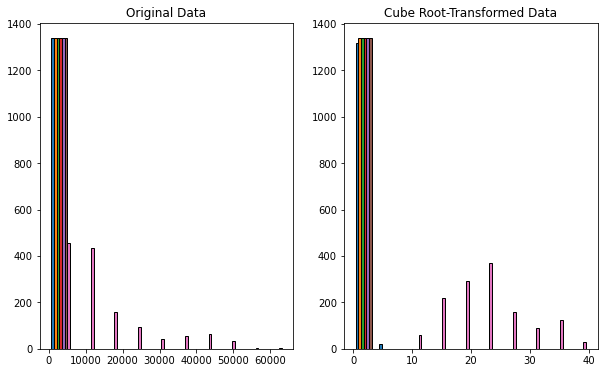

In [28]:
data_log = np.cbrt(data)

fig, axs = plt.subplots(figsize=(10,6),nrows=1, ncols=2)

axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

axs[0].set_title('Original Data')
axs[1].set_title('Cube Root-Transformed Data')


In [29]:
# set the data type of the data frame
data = data.astype(float)
data.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

In [30]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19.0,1.0,27.900,0.0,1.0,1.0,16884.92400
1,18.0,0.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,0.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,0.0,22.705,0.0,0.0,3.0,21984.47061
4,32.0,0.0,28.880,0.0,0.0,3.0,3866.85520
5,31.0,1.0,25.740,0.0,0.0,2.0,3756.62160


#### Relationship between variables
Using normalized value, analyze the relationships between variables

Text(0.5, 1.0, 'Relationship between the intersecting variables')

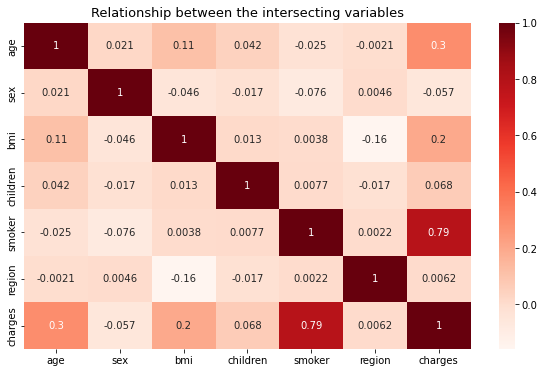

In [31]:
# Correlation : analyzing relationships between variables through Correlogram
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot = True)
plt.title('Relationship between the intersecting variables',
          fontsize=13)

#### Outliers 

In [32]:
# detect outliers option 2 (Z-score method)

# find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

# keep rows with all z-scores less than absolute value of 3
data_clean = data[(z<3).all(axis=1)]

# find how many rows are left in the dataframe 
print('Cleaned data set:',data_clean.shape)
print('-'*50)

# original data set shape
print('Original data set:',data.shape)



Cleaned data set: (1309, 7)
--------------------------------------------------
Original data set: (1338, 7)


## STEP 4. Split Data to Find Best Model
* We are going to drop some of independent variable and test to see which model fits the best.

In [33]:
# 1.age,bmi,smoker
X1 = data_clean.drop(['sex','children','region','charges'], axis=1)
y1=  data_clean.charges
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2, random_state = 0)

In [34]:
# Conduct OLS regression 1
multi_model = ols('charges~ age+bmi+smoker', data = data_clean).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:                -13218.
No. Observations:                1309   AIC:                         2.644e+04
Df Residuals:                    1305   BIC:                         2.646e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.13e+04    926.132    -12.198      0.0

In [35]:
# 2.age,bmi,smoker,children
X2 = data_clean.drop(['sex','region','charges'], axis=1)
y2=  data_clean.charges
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2, random_state = 0)

In [36]:
# Conduct OLS regression 2
multi_model = ols('charges~ age+bmi+children+smoker', data = data_clean).fit()
print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     989.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:                -13210.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1304   BIC:                         2.646e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.17e+04    926.712    -12.630      0.0

In [37]:
# 3.age,sex,bmi,children,smoker,region
X3 = data_clean.drop(['charges'], axis=1)
y3=  data_clean.charges
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2, random_state = 0)

In [38]:
# Conduct OLS regression 3
multi_model = ols('charges~ age+sex+bmi+children+smoker+region', data = data_clean).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     661.9
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:                -13207.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1302   BIC:                         2.647e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.291e+04   1069.249    -12.072      0.0

In [39]:
# 4.age,bmi,children,smoker,region
X = data_clean.drop(['sex','charges'], axis=1)
y=  data_clean.charges
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [40]:
# Conduct OLS regression 4
multi_model = ols('charges~ age+bmi+children+smoker+region', data = data_clean).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     794.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:                -13208.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1303   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.284e+04   1050.268    -12.222      0.0

* When using age,bmi,smoker,children,region, the r-square was the highest, and p-value were less than 0.05
* we are going to use this variable ( model4) to create a model

## STEP 5. Assumption Check

#### Residual Analysis

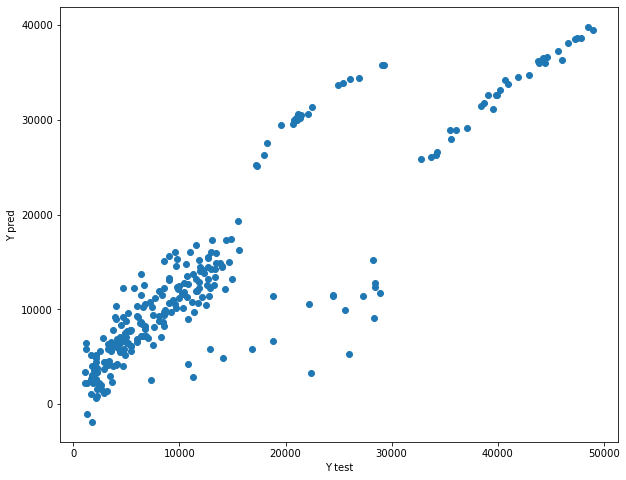

In [48]:
# Scatter plot the results
plt.figure(figsize=(10,8))
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

Text(0.5, 1.0, 'Model Residual Q-Q plot')

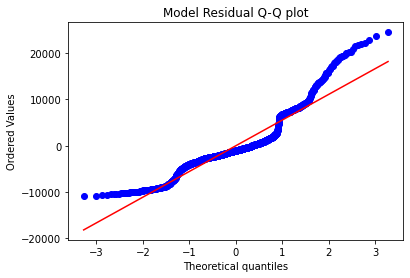

In [49]:
# Residual analysis: Q-Q plot
stats.probplot(multi_model.resid, dist = 'norm',plot = plt)
plt.title("Model Residual Q-Q plot")

* inverted s-curve implies a distribution has a short tail.
* A few points lying away from the line implies a distribution with outliers.
* The pattern violate the assumption that the residuals are normally distributed.

#### Residual vs. Fitted Plot
* Scatter plot of residuals on the y-axis and fitted values (est. responses) on the x-axis.
* Used to detect non-linearity, unequal error variances, and outliers.
* Based on the results below, all the plots seem to exhibit patterns which indictates heteroscedascity and fails the assumption check for homoscedasticity.

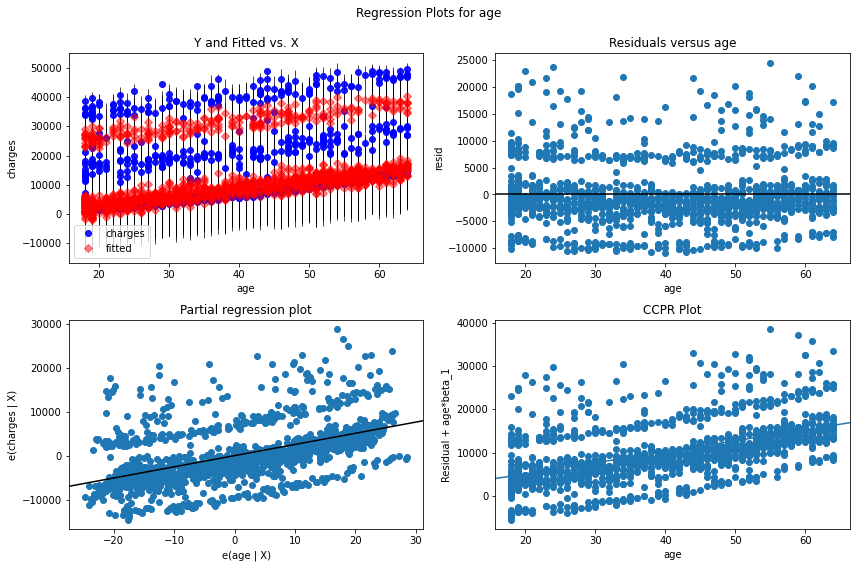

In [50]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'age', fig=fig)

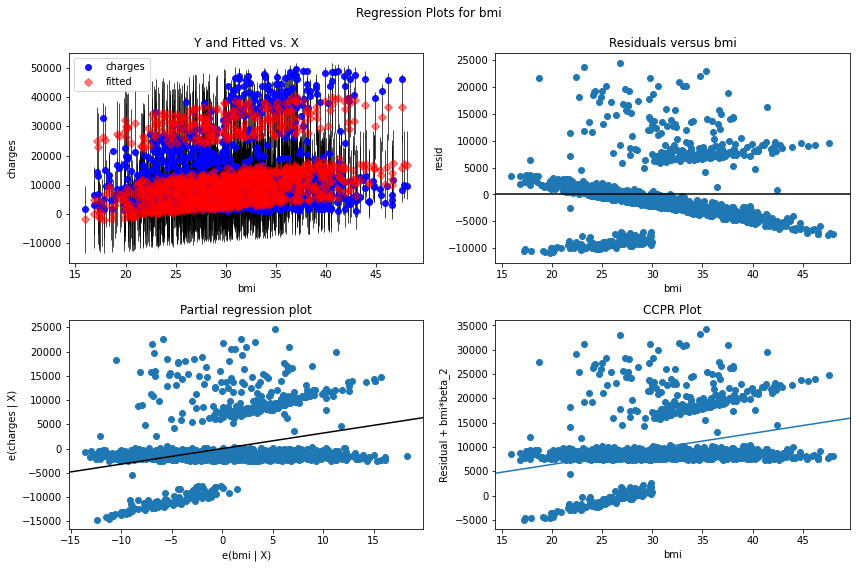

In [51]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'bmi', fig=fig)

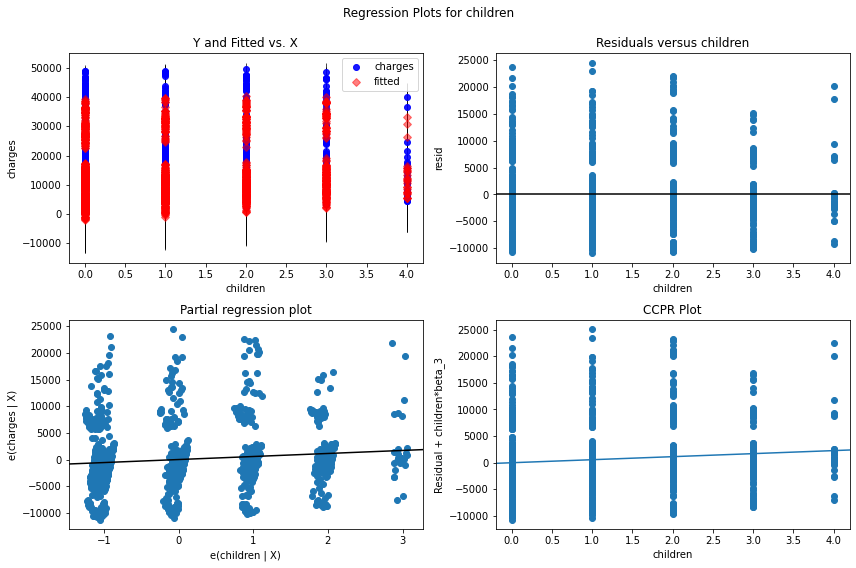

In [52]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'children', fig=fig)

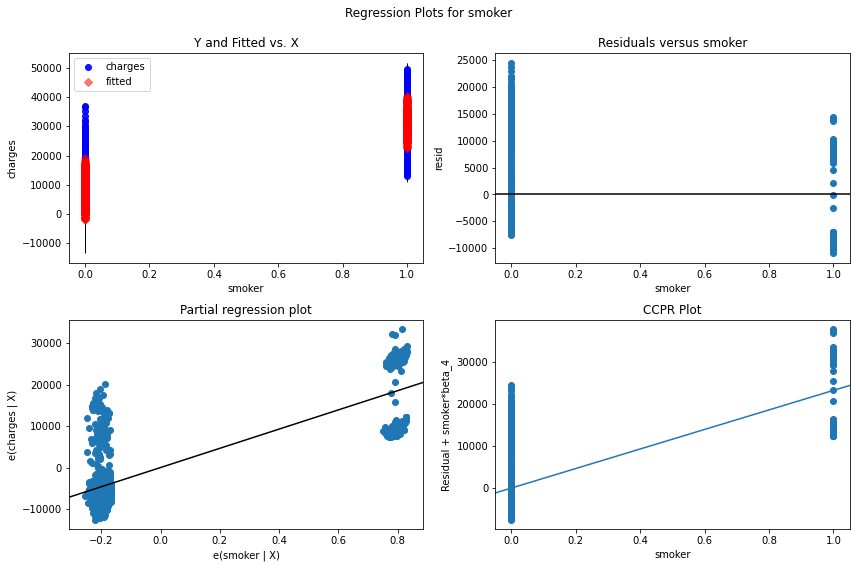

In [53]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'smoker', fig=fig)

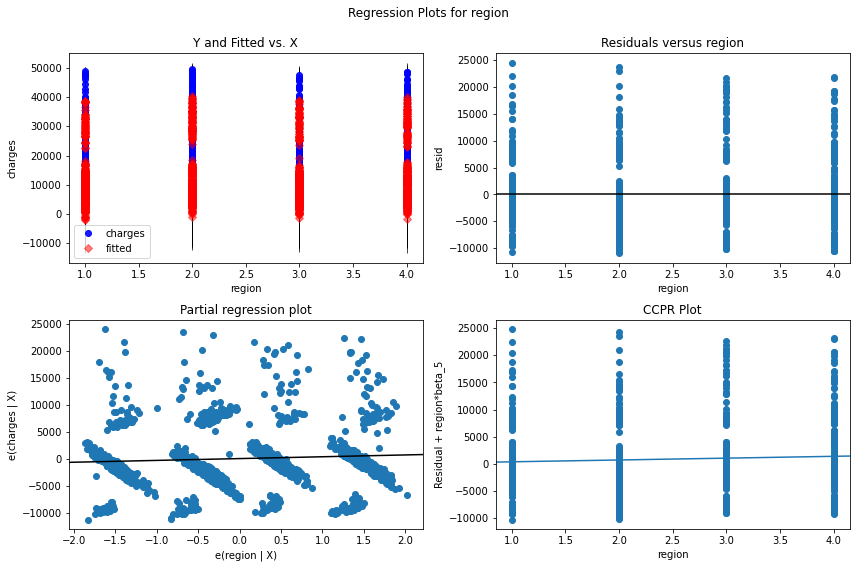

In [54]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multi_model, 'region', fig=fig)

In [55]:
# Multicollinearity with VIF
# Generally, a VIF above 5 indicates a high multicollinearity



x = data_clean[['age', 'bmi', 'sex', 'children', 'smoker', 'region']]

# create data frame
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

# calculate vif
vif_data["VIF"]= [variance_inflation_factor(x.values, i)
                      for i in range(len(x.columns))]
#Display results
vif_data

# Both age and bmi have very high values of VIF, indicating that these two
# variables are highly correlated.  
# As we age, we lose more muscle mass and gain more body fat, so it makes
# sense that age and bmi are correlated.


,Feature,VIF
0,age,8.044710
1,bmi,10.238836
2,sex,1.937572
3,children,1.856850
4,smoker,1.251270
5,region,4.903480


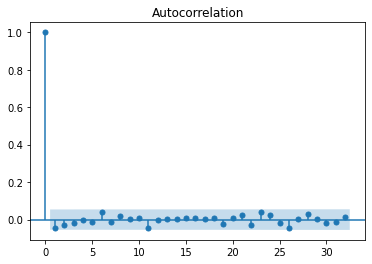

In [56]:
# plot for autocorrelation
sm.graphics.tsa.plot_acf(multi_model.resid)
plt.show()

Linear Relationship - satisfied/
No Multicollinearity - violated/
Independence - satisfied/
Multivariate Normality - violated


## STEP 6. Create and Train model


In [42]:
# Splitting data 80-20
X = data_clean.drop(['sex','charges'], axis=1)
y=  data_clean.charges

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [44]:
# Create and train the  model
lin_reg = LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=None)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

## STEP 7. Run Diagnostic Test

In [45]:
lin_reg.fit(X_train,y_train)
pred= lin_reg.predict(X_test)

In [46]:
# Check R2 score
print("R2 score: ",(r2_score(y_test,pred)))

R2 score:  0.7901004454697242


In [47]:
# Run the diagnostic test on the model
y_pred_0 = lin_reg.predict(X_test)
print(y_pred_0)

[ 2179.49496916  4422.57904438 14465.8422917   7100.79978269
 13173.04256429 12676.65606513  4032.42363645  1081.51245028
 14918.27847572  5647.82143336 11417.67562753   666.16243575
  5862.91485789  5627.70604911 35983.33631433 26302.45726933
 34295.0257071   1555.82654346  5138.10086448 14579.29950265
  5811.54508941 14193.3672339   4453.61281585 26638.51027404
  2654.81539158  2011.9732491   5624.17461335  6101.62682959
 15079.41650774 30479.24475424  8550.10442606  6487.98508244
  4872.75998546  9759.05578026 11839.5332907  14219.26083877
 11301.51413944  9338.1702143   7823.06454101  9243.19095721
 36250.25277058 15024.95644426  7684.04825056 32611.6923626
 36329.3018885  12184.74207294 14614.21757413  9589.42747342
 11337.37867439  7849.84210447 12594.56607257 14067.38670721
  3405.7405368  38051.83886379  5921.11959027 11894.3956919
 29174.55039813 33091.5746786   2973.73876142  3053.51580217
 36346.74467331  6545.78688084  9729.97480151  2752.80517835
  9422.48286316  2877.1423

## STEP 8. Getting Equation and Testing Performance of Model

In [57]:
print(lin_reg.coef_) #slope

[  251.99040466   328.24653984   588.07914659 22756.01915836
   305.2682036 ]


In [58]:
print(lin_reg.intercept_) #intercept

-12838.881250831982


In [59]:
print('y= -12838.881250831982 + 251.99040466 * x1 + 328.24653984 * x2 + 588.07914659 * x3 + 22756.01915836 * x4 + 305.2682036 * x5') 

y= -12838.881250831982 + 251.99040466 * x1 + 328.24653984 * x2 + 588.07914659 * x3 + 22756.01915836 * x4 + 305.2682036 * x5


In [60]:
# test the model
data = {'age':50,'bmi':25,'children':2,'smoker':0,'region':2}
index = [0]
cust_df = pd.DataFrame(data,index)
cust_df


,age,bmi,children,smoker,region
0,50,25,2,0,2


In [61]:
# Predicting the cost
cost_pred=lin_reg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9753.49717872]


In [62]:
# Compare real value vs predicted value
pred_y_df = pd.DataFrame({"Real Values":y_test, "Predicted Values":pred,
'Difference': y_test-pred})
pred_y_df[0:11]

,Real Values,Predicted Values,Difference
1163,2200.83085,2179.494969,21.335881
541,3056.38810,4422.579044,-1366.190944
467,12643.37780,14465.842292,-1822.464492
1174,4433.91590,7100.799783,-2666.883883
398,14988.43200,13173.042564,1815.389436
1213,10806.83900,12676.656065,-1869.817065
5,3756.62160,4032.423636,-275.802036
236,1615.76670,1081.512450,534.254250
335,13822.80300,14918.278476,-1095.475476
902,4661.28635,5647.821433,-986.535083


In [63]:
# Measures of Error

import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate mean squared error
model_mse = mean_squared_error(y_test, pred)

# calculate mean absolute error
model_mae = mean_absolute_error(y_test, pred)

# calculate root mean squared error
model_rmse = math.sqrt(model_mse)

print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 3.27e+07
MAE 4.15e+03
RMSE 5.72e+03


In [64]:
#Checking for Heteroscedasticity

from statsmodels.stats import diagnostic as diag
    
# running the breuschpagan's test
_, pval, _, f_pval = diag.het_breuschpagan(multi_model.resid, multi_model.model.exog)
print(pval, f_pval)
print('-'*50)

if pval > 0.05:
    print("For the Breusch-Pagan's test")
    print('The p-value was {:.4}'.format(pval))
    print('We fail to reject the null hypothesis, so there is no heteroscedasticity. \n')
else: 
    print("For the Breusch_Pagan's test")
    print('The p-value was {:.4}'.format(pval))
    print('We reject the null hypothesis, so there is heteroscedasticity. \n')
    

1.1302737890541338e-20 1.6793980122996474e-21
--------------------------------------------------
For the Breusch_Pagan's test
The p-value was 1.13e-20
We reject the null hypothesis, so there is heteroscedasticity. 



# Conclusion 


#### Interpret the result 

Group 4 has some concerns about using the final multiple regression model for future predictions since some assumption checks were violated. Firstly, independent variables were not normally distributed. Therefore, logarithmic conversion, cube root transformation and/or rescaling data points by creating dummy variables were tried, but they did not provide normal distribution for the variables. In addition, multicollinearity was checked by using VIF scores and heatmaps. BMI, age and region had more the 5 VIF scores, but these variables were not removed since the researchers were interested in the effect of group of variables on the target variables. Moreover, with and without outliers, various combinations and numbers of independent variables were tested to develop a better multiple linear regression model to predict the charges. However, correlation coefficients were not above 0.79 for any models. Multiple Linear regression models were also tested by making residual analysis and calculating MSE and MAE. 

The best fitted model was created by using age, bmi, number of children, smoker’yes’, and region independent variables.
The best fitted regression model: 

y(charges)= -12838.881250831982 + 251.99040466 * x1(age) + 328.24653984 * x2(bmi) + 588.07914659 * x3(number of children) + 22756.01915836 * x4(smoker'yes') + 305.2682036 * x5(region)

The equation tells us that when the person who is older, has higher bmi , more children, is smoker, and live in southeast area is likely to be charged higher medical cost by insurance company.

The overall the multiple linear regression model was statistically significant (R2 = 0.754, F(5, 1305) = 802.2, p = <.000). The model was also statistically significant for each parameter. For age, bmi, number of children, smoker’yes’ and region, p values were p=<0.000, p=<0.000, p=<0.000, p=<0.000 and p=0.023 respectively.
When the final multiple linear regression model was tested, coefficient of determination was 0.7901. It can be interpreted that this regression model has been explained 79.01% of the total variation based on our original data. So, it can be said that predicted and actual responses fairly fit.


Assumption Check for Multiple Linear Regression Model:

Linear Relationship - satisfied/
No Multicollinearity - violated/
Independence - satisfied/
Homoscedasticity - violated/
Multivariate Normality - violated

Three of assumptions were violated, which tells us that it can impact the ability to trust the  results and validly draw inferences about predicted results. 



#### How do you want to use your model?
We can use this model to predict future insurance cost based on people's labeled data very cautiously if it is needed. Since the data set include categorical variables, logistic regression analysis can be tried in the future. For a logistic regression analysis, age and bmi values can be categorized by creating some intervals which are defined as risk factors in previous studies.  Since multicollinearity is an issue for this data set, Ridge or Lasso regression can be also tried to improve the prediction.
Insurance companies can also provide  pricing solutions by using this model.  To offer premium price for the people who have higher chance to be charged higher insurance cost could be one of the examples. 




